# Medical Data Visualizer
<div align="center">
    <img src="https://www.springboard.com/blog/wp-content/uploads/2020/07/what-does-a-data-scientist-in-healthcare-do-1.png" alt="Demographic Picture" width="500">
</div>

In [43]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [44]:
# Import dataset
df = pd.read_csv("medical_examination.csv")

In [45]:
# Task 1: Add overweight column
df["BMI"] = df["weight"] / ((df["height"] / 100) ** 2)
df["overweight"] = (df["BMI"] > 25).astype(int)
df.drop(["BMI"], axis = 1, inplace = True)

In [46]:
# Task 2: Normalize the data
def normalize(value):
    if value == 1:
        return 0
    elif value > 1:
        return 1
    else:
        return value

df["cholesterol"] = df["cholesterol"].apply(normalize)
df["gluc"] = df["gluc"].apply(normalize)

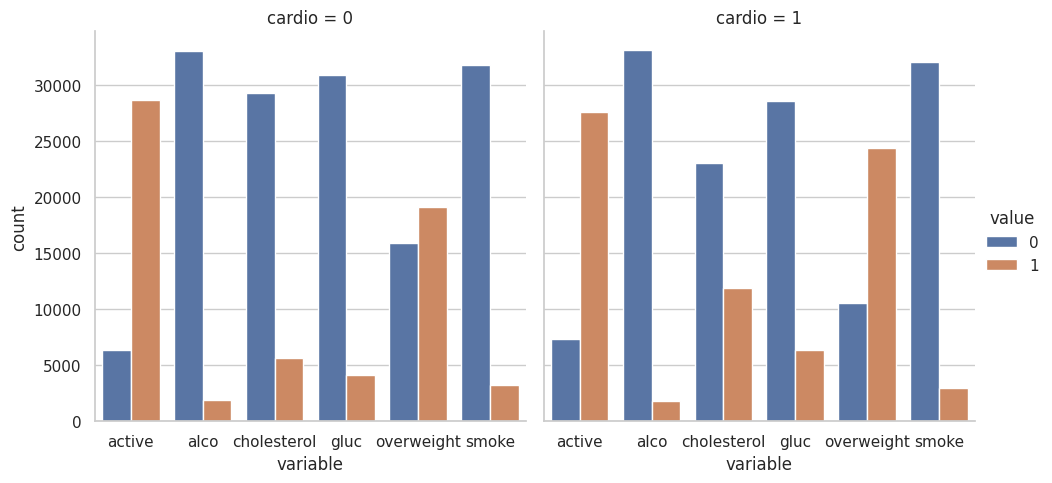

In [47]:
# Convert data to long format
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])

# Create a catplot
sns.set(style="whitegrid")
g = sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count")

# Display the plot
plt.show()

In [48]:
# Filter out incorrect data
df_cleaned = df[
    (df['ap_lo'] <= df['ap_hi']) &  # diastolic pressure is not higher than systolic
    (df['height'] >= df['height'].quantile(0.025)) &  # height >= 2.5th percentile
    (df['height'] <= df['height'].quantile(0.975)) &  # height <= 97.5th percentile
    (df['weight'] >= df['weight'].quantile(0.025)) &  # weight >= 2.5th percentile
    (df['weight'] <= df['weight'].quantile(0.975))    # weight <= 97.5th percentile
]

<Axes: >

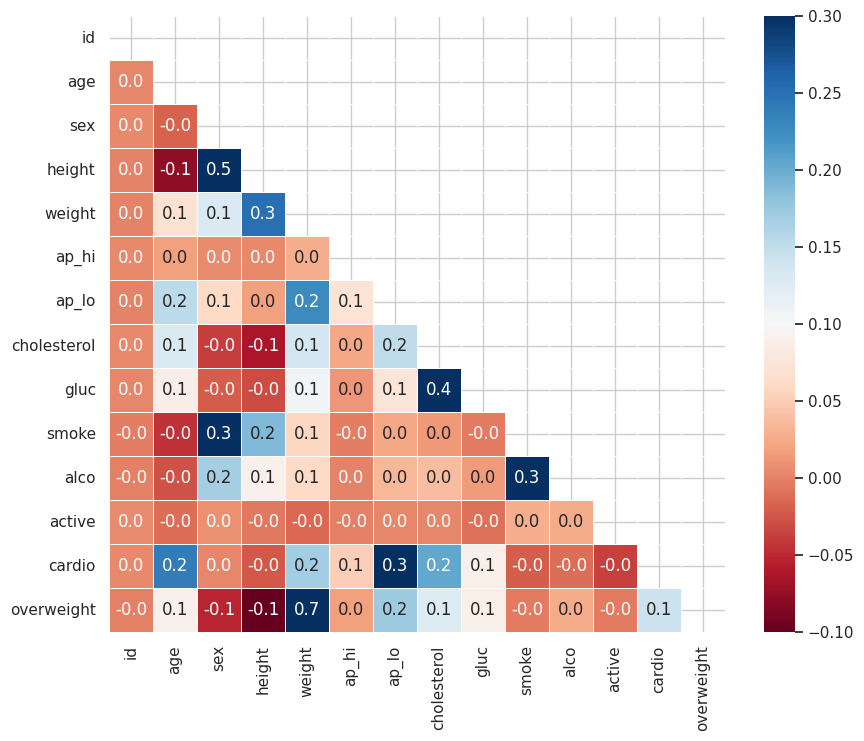

In [49]:
# Create a correlation matrix
corr_matrix = df_cleaned.corr()

# Mask the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap='RdBu', vmax=0.3, vmin=-0.1,
            square=True, annot=True, fmt='.1f', linewidths=.5, ax=ax)